### Lab 1 Python Fundamentals

#### Task:
- Count and plot DNA sequences

In [15]:
# open up the 'dna_raw.txt' -data file

def read_dna_file(file_path = 'dna_raw.txt'):
    with open(file_path, 'r') as file:
        lines = file.readlines()

# make a dictionary of the dna sequences

    sequences = {}
    sequence_id = None
    sequence = ''

    for line in lines:
        line = line.strip()
        if line.startswith('>'):
            if sequence_id:
                sequences[sequence_id] = sequence
            sequence_id = line[1:]
            sequence = ''
        else:
            sequence += line.lower()
    if sequence_id:
        sequences[sequence_id] = sequence
        
        return sequences

In [32]:
from collections import Counter

#creating a function that counts the number of A, T, C, G in the sequences

def count_dna_letters(sequences):
    dna_counts = {}
    for sequence_id, sequence in sequences.items():
        counts = {'A' : 0, 'T' : 0, 'C' : 0, 'G' : 0}

        # Loop counting only occurrences of A, T, C, G
        for letter in sequence:
            if letter in counts:
                counts[letter] += 1
        # Store the counts
        dna_counts[sequence_id] = counts
        sequence = sequence.upper()
    return dna_counts


In [33]:
# plot the counts of the sequences

import matplotlib.pyplot as plt

def plot_dna_counts(dna_counts):
    for sequence_id, counts in dna_counts.items():
        letters = list(counts.keys())
        frequencies = list(counts.values())

        plt.figure()
        plt.bar(letters, frequencies, color = ['red', 'green', 'blue', 'yellow'])
        plt.title(f"Frequency of DNA letters in {sequence_id}")
        plt.xlabel('DNA letter')
        plt.ylabel('Frequency')
        plt.show()

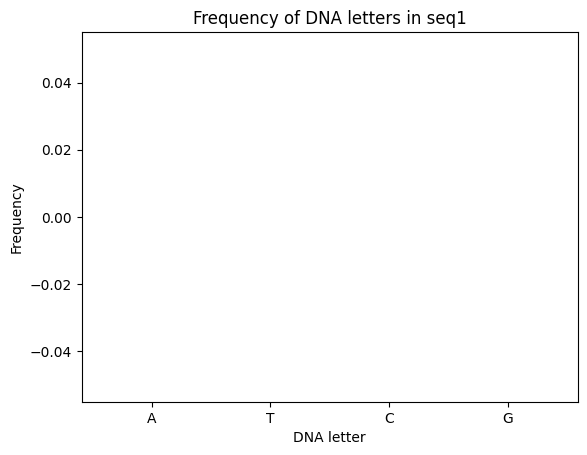

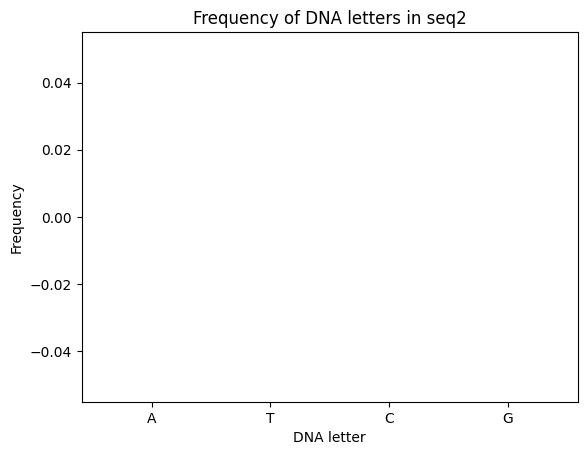

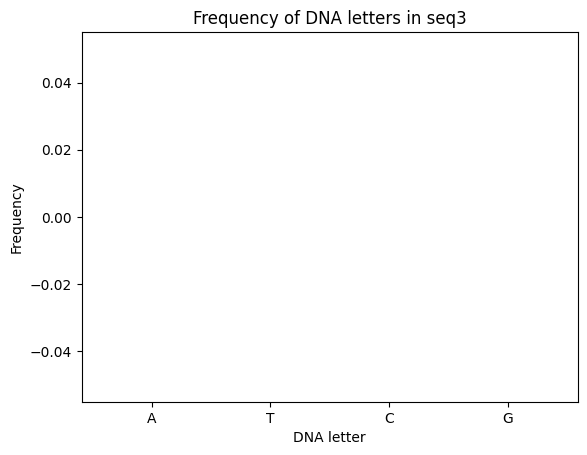

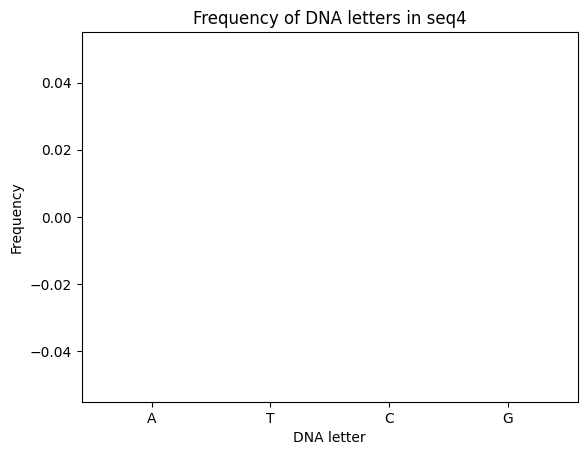

In [34]:
# Putting it all together

# Step 1: Read the DNA file
file_path = 'dna_raw.txt'
sequences = read_dna_file(file_path)

# Step 2: Count the DNA sequences
dna_counts = count_dna_letters(sequences)

# Step 3: Plot the DNA counts
plot_dna_counts(dna_counts)

#### Trouble shooting to check why bars are not plotting

In [25]:
# Checking the working directory
import os
print(os.getcwd())

file_path = 'dna_raw.txt'

/Users/susannarokka/Desktop/Python/Lab1_Python_DNA


In [36]:
# Checking the existence of the file in the working directory
import os
file_path = 'dna_raw.txt'
print(os.path.exists(file_path))

True


In [37]:
# Checking to see the sequences from file are reading correctly

with open('dna_raw.txt', 'r') as file:
    lines = file.readlines()
    print(lines[:10])

['>seq1\n', 'cGTAaccaataaaaaaacaagcttaacctaattc\n', '>seq2\n', 'agcttagTTTGGatctggccgggg\n', '>seq3\n', 'gcggatttactcCCCCCAAAAANNaggggagagcccagataaatggagtctgtgcgtccaca\n', '>seq4\n', 'gcggatttactcaggggagagcccagGGataaatggagtctgtgcgtccaca']


In [35]:
# Checking to see if the sequences are being counted properly. It seems
# all the values are zero?? So the counting function is not working properly.
# The parsing of the sequence is not formatted correctly.

print(dna_counts)

{'seq1': {'A': 0, 'T': 0, 'C': 0, 'G': 0}, 'seq2': {'A': 0, 'T': 0, 'C': 0, 'G': 0}, 'seq3': {'A': 0, 'T': 0, 'C': 0, 'G': 0}, 'seq4': {'A': 0, 'T': 0, 'C': 0, 'G': 0}}


In [48]:
# Adjusting the formatting to plot the bars
def read_dna_file(file_path = 'dna_raw.txt'):
    with open(file_path, 'r') as file:
        lines = file.read().splitlines()

    sequences = {}
    sequence_id = None
    sequence = ''

    for line in lines:
        line = line.strip()

        if line.startswith('>'):
            if sequence_id:
                sequences[sequence_id] = sequence
            sequence_id = line[1:]
            sequence = ''
        else:
            sequence += line.lower()

    if sequence_id:
        sequences[sequence_id] = sequence

    return sequences
print(sequences)

{'seq1': 'cgtaaccaataaaaaaacaagcttaacctaattc', 'seq2': 'agcttagtttggatctggccgggg', 'seq3': 'gcggatttactccccccaaaaannaggggagagcccagataaatggagtctgtgcgtccaca', 'seq4': 'gcggatttactcaggggagagcccagggataaatggagtctgtgcgtccaca'}


In [53]:
# Try again to count the sequences

def count_dna_letters(sequences):
    dna_counts = {}
    for sequence_id, sequence in sequences.items():
        # Initialize the counts: A, T, C, G
        counts = {'a' : 0, 't' : 0, 'c' : 0, 'g' : 0}

        # For-loop to count occurrences of A, T, C, G
        for letter in sequence:
            if letter in counts:
                counts[letter] += 1

        dna_counts[sequence_id] = counts
    return dna_counts
print(dna_counts)

{'seq1': {'A': 0, 'T': 0, 'C': 0, 'G': 0}, 'seq2': {'A': 0, 'T': 0, 'C': 0, 'G': 0}, 'seq3': {'A': 0, 'T': 0, 'C': 0, 'G': 0}, 'seq4': {'A': 0, 'T': 0, 'C': 0, 'G': 0}}


In [51]:
# Checking AGAIN to see the sequences from file are reading correctly

with open('dna_raw.txt', 'r') as file:
    lines = file.readlines()
    print(lines[:10])

['>seq1\n', 'cGTAaccaataaaaaaacaagcttaacctaattc\n', '>seq2\n', 'agcttagTTTGGatctggccgggg\n', '>seq3\n', 'gcggatttactcCCCCCAAAAANNaggggagagcccagataaatggagtctgtgcgtccaca\n', '>seq4\n', 'gcggatttactcaggggagagcccagGGataaatggagtctgtgcgtccaca']


In [54]:
import matplotlib.pyplot as plt

def plot_dna_counts(dna_counts):
    for sequence_id, counts in dna_counts.items():
        letters = [letter.upper() for letter in counts.keys()]
        frequencies = list(counts.values())

        plt.figure()
        plt.bar(letters, frequencies, color = ['red', 'green', 'blue', 'yellow'])
        plt.title(f"Frequency of DNA letters in {sequence_id}")
        plt.xlabel('DNA letters')
        plt.ylabel('Frequency')
        plt.show()

**figured out that upper case and lower case string parsing was the issue - this is why the code was not running properly, and the graph bars were not plotting because there were no values to plot from**


{'seq1': {'a': 17, 't': 7, 'c': 8, 'g': 2}, 'seq2': {'a': 3, 't': 7, 'c': 4, 'g': 10}, 'seq3': {'a': 18, 't': 10, 'c': 16, 'g': 16}, 'seq4': {'a': 13, 't': 10, 'c': 11, 'g': 18}}


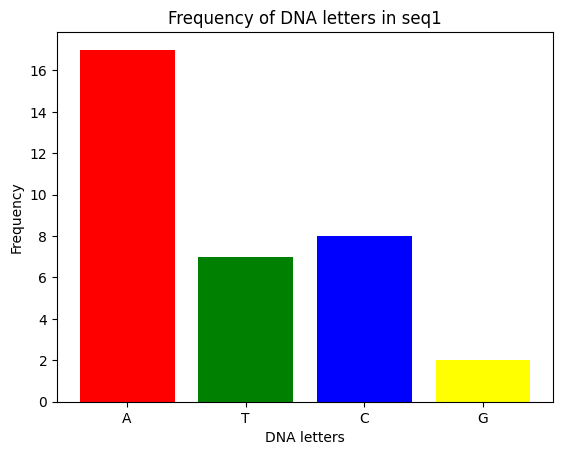

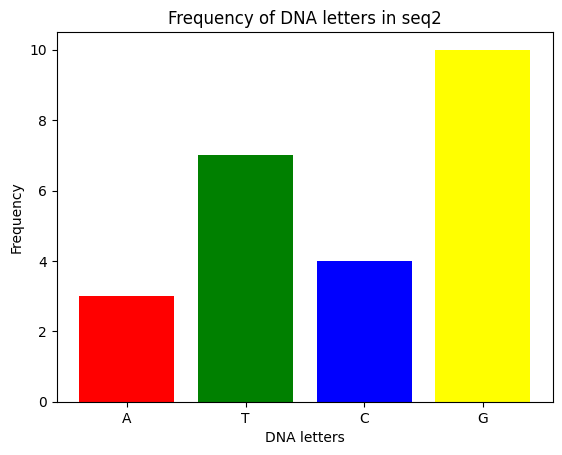

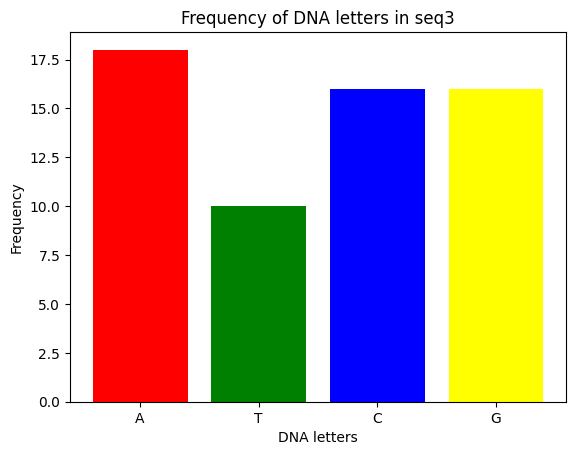

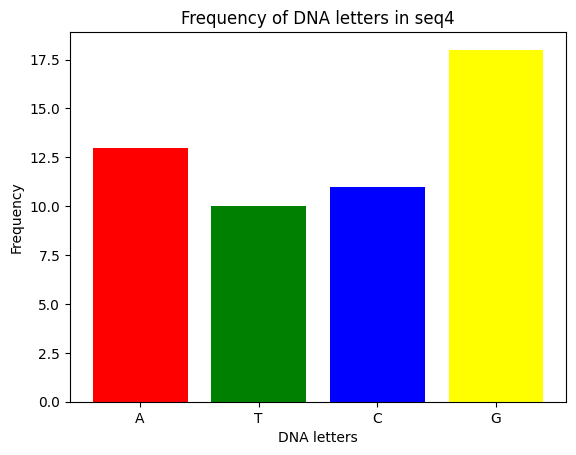

In [55]:
file_path = 'dna_raw.txt'
sequences = read_dna_file(file_path)

dna_counts = count_dna_letters(sequences)
print(dna_counts)

plot_dna_counts(dna_counts)

**Next task is to create a function that:
- Takes in new data files (similar to dna_raw.txt)
- Parses and plots data of variable sequence and frequency from above
- Can i use the above code or does it need to be adjusted? if so, how?